생활인구 증감은 자동차 등록 증감에 어떤 영향을 미치는가?

In [2]:
import pandas as pd
from sqlalchemy import create_engine

db_user = "root"
db_password = "12341234"
db_host = "localhost"
db_port = "3306"
db_name = "miniproject"

engine = create_engine(f"mysql+pymysql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}")

df = pd.read_sql("SELECT * FROM seoul_analysis_view", engine)
df.head()


,district_id,district_name,year,population,population_diff,car_count,car_diff,cctv_count
0,1,종로구,2021,156567,-5417,50049,-11,149
1,1,종로구,2022,153684,-2883,50832,783,149
2,1,종로구,2023,152212,-1472,51000,168,149
3,1,종로구,2024,150550,-1662,50482,-518,149
4,1,종로구,2025,149478,-1072,50083,-399,149


In [3]:
df[["population_diff", "car_diff"]].describe()


,population_diff,car_diff
count,125.0000,125.000000
mean,-3287.6400,383.552000
std,5724.8184,2307.745983
min,-13768.0000,-3984.000000
25%,-6552.0000,-797.000000
50%,-3473.0000,-113.000000
75%,-1580.0000,1107.000000
max,34453.0000,12951.000000


In [4]:
df[["population_diff", "car_diff"]].corr()


,population_diff,car_diff
population_diff,1.000000,0.509377
car_diff,0.509377,1.000000


In [12]:
X = df[["population_diff"]]
y = df["car_diff"]


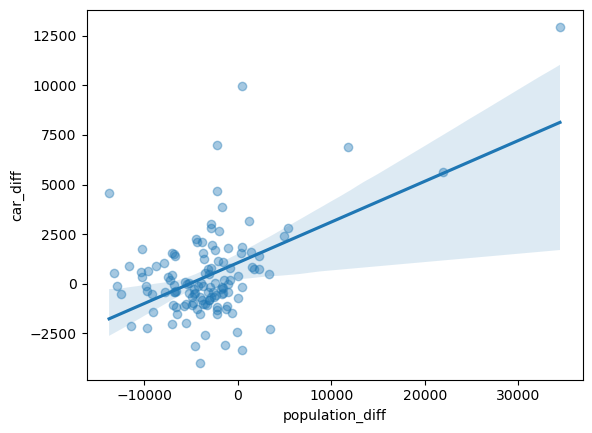

In [13]:
sns.regplot(
    data=df,
    x="population_diff",
    y="car_diff",
    scatter_kws={"alpha": 0.4}
)
plt.show()


In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

coef = model.coef_[0]
intercept = model.intercept_


In [ ]:
import pandas as pd

result_df = pd.DataFrame({
    "Coefficient": [coef],
    "Intercept": [intercept]
}, index=["population_diff"])

result_df


,Coefficient,Intercept
population_diff,[0.5093765823400703],[7.638424355040475e-18]


In [18]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)
y_scaled = StandardScaler().fit_transform(y.values.reshape(-1, 1))

model.fit(X_scaled, y_scaled)

std_coef = model.coef_[0][0]


In [19]:
std_df = pd.DataFrame({
    "Standardized Coefficient": [std_coef]
}, index=["population_diff"])

std_df


,Standardized Coefficient
population_diff,0.509377
